## 라이브러리 로드

In [4]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print(pd.__version__)
print(sns.__version__)

1.1.5
0.11.2


In [ ]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요. 
# !pip install seaborn --upgrade

## 데이터셋 불러오기

In [6]:
# mpg 데이터셋을 불러옵니다.
# df
df = sns.load_dataset("mpg")

## 데이터셋 일부만 가져오기

In [7]:
# head
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
# tail
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## 요약하기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##  결측치 보기

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## 기술통계

In [12]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


## 범주형 변수
### 범주형 데이터 유일값의 빈도수

In [13]:
# nunique 값 구하기
df.nunique

<bound method DataFrame.nunique of       mpg  cylinders  ...  origin                       name
0    18.0          8  ...     usa  chevrolet chevelle malibu
1    15.0          8  ...     usa          buick skylark 320
2    18.0          8  ...     usa         plymouth satellite
3    16.0          8  ...     usa              amc rebel sst
4    17.0          8  ...     usa                ford torino
..    ...        ...  ...     ...                        ...
393  27.0          4  ...     usa            ford mustang gl
394  44.0          4  ...  europe                  vw pickup
395  32.0          4  ...     usa              dodge rampage
396  28.0          4  ...     usa                ford ranger
397  31.0          4  ...     usa                 chevy s-10

[398 rows x 9 columns]>

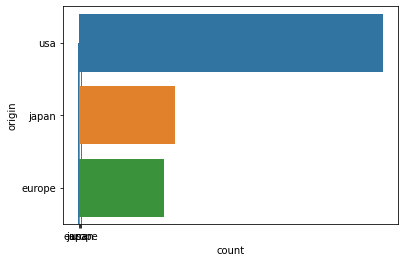

In [17]:
# countplot 으로 origin 빈도수 시각화 하기
sns.countplot(data=df,x="origin")
sns.countplot(data=df,y="origin")

### 1개 변수의 빈도수

In [18]:
# origin 의 빈도수 구하기
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 2개 이상의 변수에 대한 빈도수

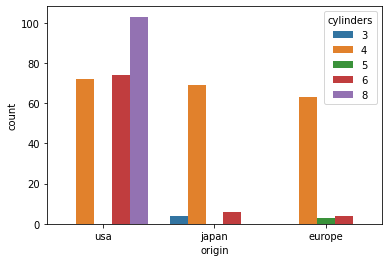

In [19]:
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders 로 다른 색상으로 표현하기
sns.countplot(data=df,x="origin",hue="cylinders")

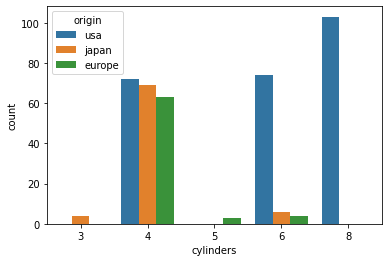

In [21]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin 으로 다른 색상으로 표현하기
sns.countplot(data=df,x="cylinders",hue="origin")

In [23]:
# pd.crosstab 으로 시각화한 값 직접 구하기
#두개 이상의 빈도수를 시각화 할 때 사용(한개는 value_counts)
pd.crosstab(df["origin"],df["cylinders"])
pd.value_counts(df["origin"])

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 범주형 vs 수치형 변수

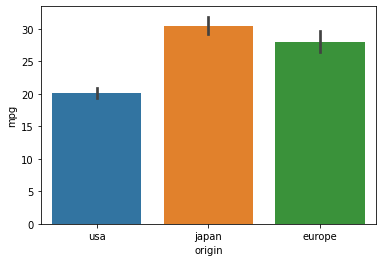

In [25]:
# barplot 으로 origin 별 mpg 값 구하기
# y값의 대표값은 평균
# ci = 신뢰 구간(confidence interval) - default:95%
sns.barplot(data=df,x="origin",y="mpg",estimator=np.mean,ci=95)

### groupby 를 통한 연산

In [28]:
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
# mean: 수학적으로 정의되는 평균값.
# average: 수학 용어가 아닌 일상 용어. 데이터를 잘 표현하는 대표값 정도로 해석될 수 있다.
df.groupby("origin")["mpg"].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

### pivot table을 통한 연산

In [29]:
# pivot_table 로 같은 값 구하기
# groupby와의 차이점: dataframe으로 반환이 됨
pd.pivot_table(data=df, index="origin",values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


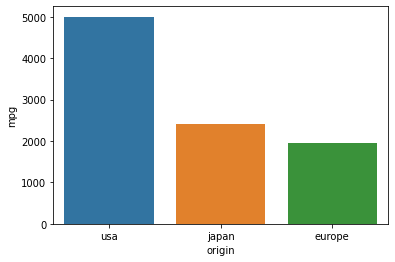

In [32]:
# barplot 으로 합계 값 구하기
sns.barplot(data=df,x="origin",y="mpg",estimator=np.sum,ci=None)

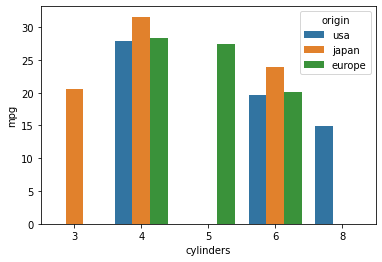

In [34]:
# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기
sns.barplot(data=df,x="cylinders",y="mpg",ci=None,hue="origin")

In [38]:
# groupby 를 통해 위 시각화에 대한 값을 구하기
df.groupby(["cylinders","origin"])["mpg"].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [40]:
# pivot_table 를 통해 위 시각화에 대한 값을 구하기
pd.pivot_table(data=df,index="cylinders",columns="origin",values="mpg")

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


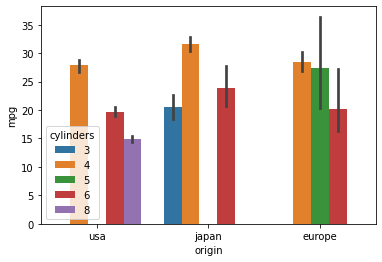

In [41]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화
sns.barplot(data=df,x="origin",y="mpg",hue="cylinders")

### boxplot과 사분위수

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" width="300">

이미지 출처 : https://en.wikipedia.org/wiki/Box_plot

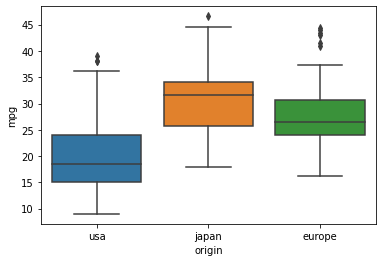

In [42]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
sns.boxplot(data=df,x="origin",y="mpg")

In [45]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기
origin_desc = df.groupby("origin")["mpg"].describe()

In [48]:
europe = origin_desc.loc["europe"]

### 박스플롯 이해하기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

In [52]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기
Q3 = europe["75%"]
Q1 = europe["25%"]
IQR = Q3 - Q1
OUT_MAX = Q3 +(1.5*IQR)
OUT_MIN = Q1 - (1.5*IQR)


14.025000000000002

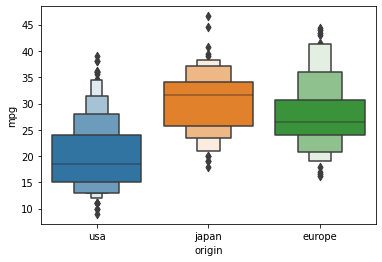

In [53]:
# boxenplot 그리기
sns.boxenplot(data=df,x="origin",y="mpg")

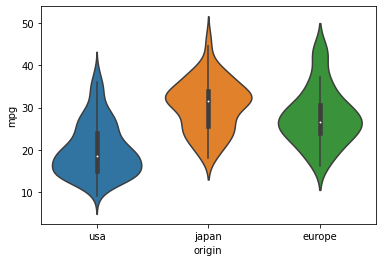

In [54]:
# violinplot 그리기
sns.violinplot(data=df,x="origin",y="mpg")

### 산점도를 통한 범주형 데이터 표현

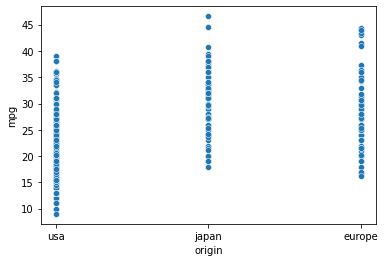

In [56]:
# scatterplot 으로 범주형 변수 그리기
# scatterplot은 범주형 변수 표현하기 좋지 않다.(같은 곳에 점이 여러 개 찍혀서)
sns.scatterplot(data=df,x="origin",y="mpg")

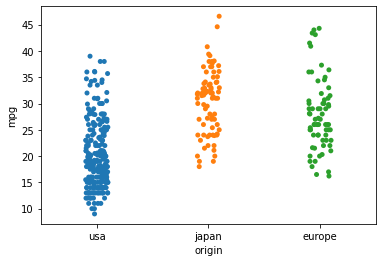

In [57]:
# stripplot
# 이것두..
sns.stripplot(data=df,x="origin",y="mpg")

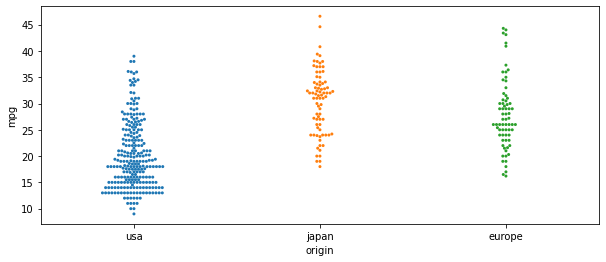

In [60]:
# swarmplot
# 범주형에 적합...

#이거 안하면 warnings 뜸(같은 곳에 점이 찍혀서)
plt.figure(figsize=(10,4))
sns.swarmplot(data=df,x="origin",y="mpg",size=3)

### catplot을 통한 범주형 데이터의 서브플롯 시각화
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500">

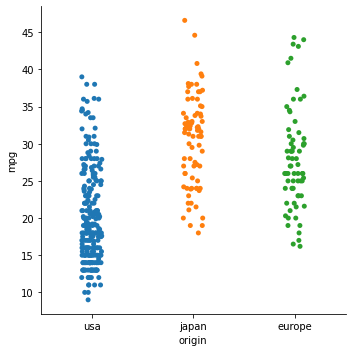

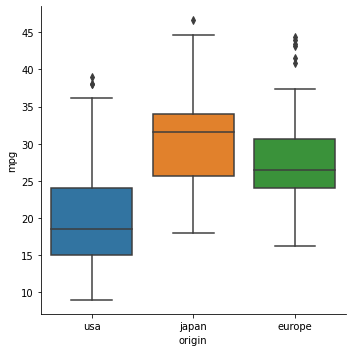

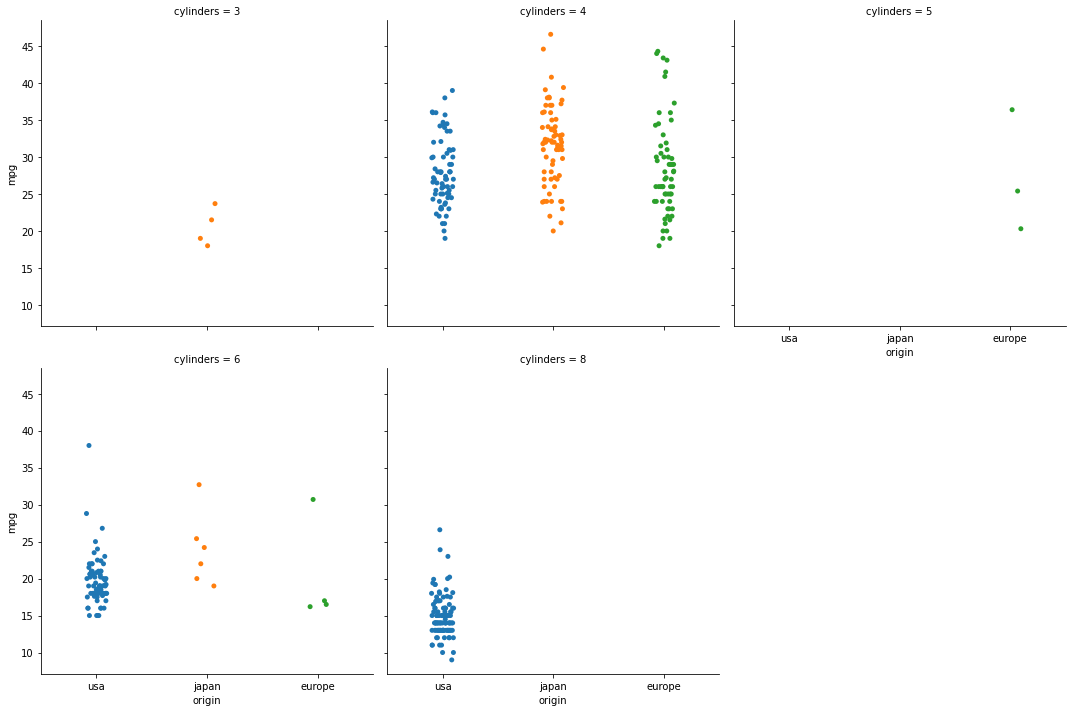

In [66]:
# catplot
sns.catplot(data=df,x="origin",y="mpg",kind="strip")
sns.catplot(data=df,x="origin",y="mpg",kind="box")
sns.catplot(data=df,x="origin",y="mpg",col="cylinders",col_wrap=3)

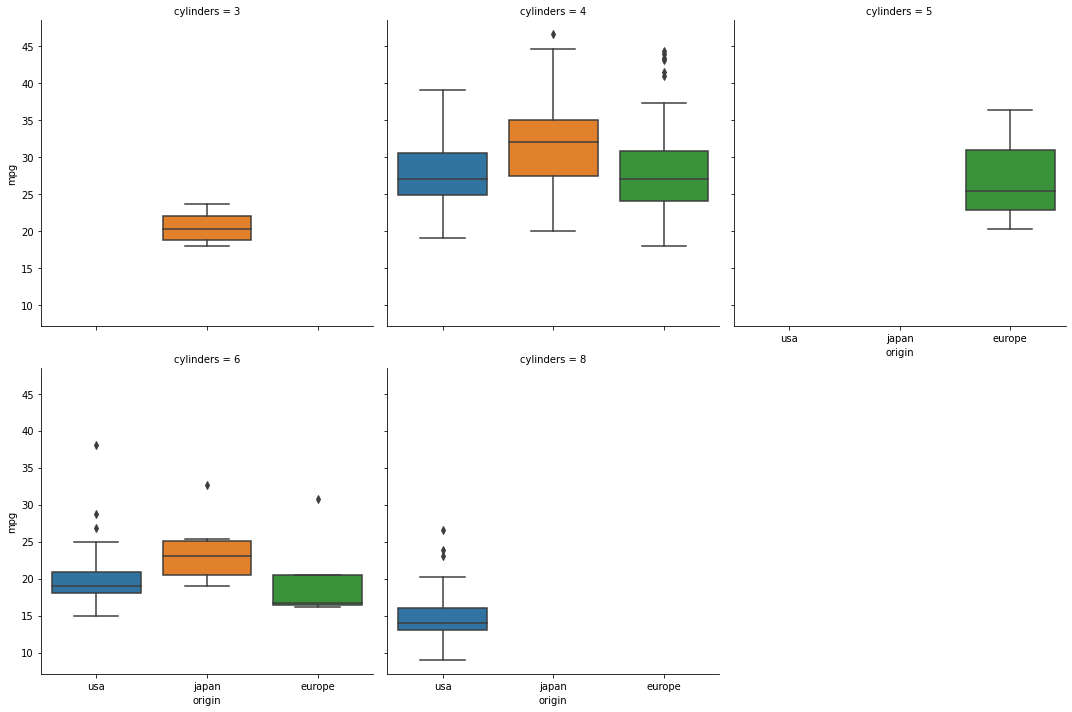

In [68]:
# catplot 으로 boxplot그리기
sns.catplot(data=df,x="origin",y="mpg",kind="box",col="cylinders",col_wrap=3)

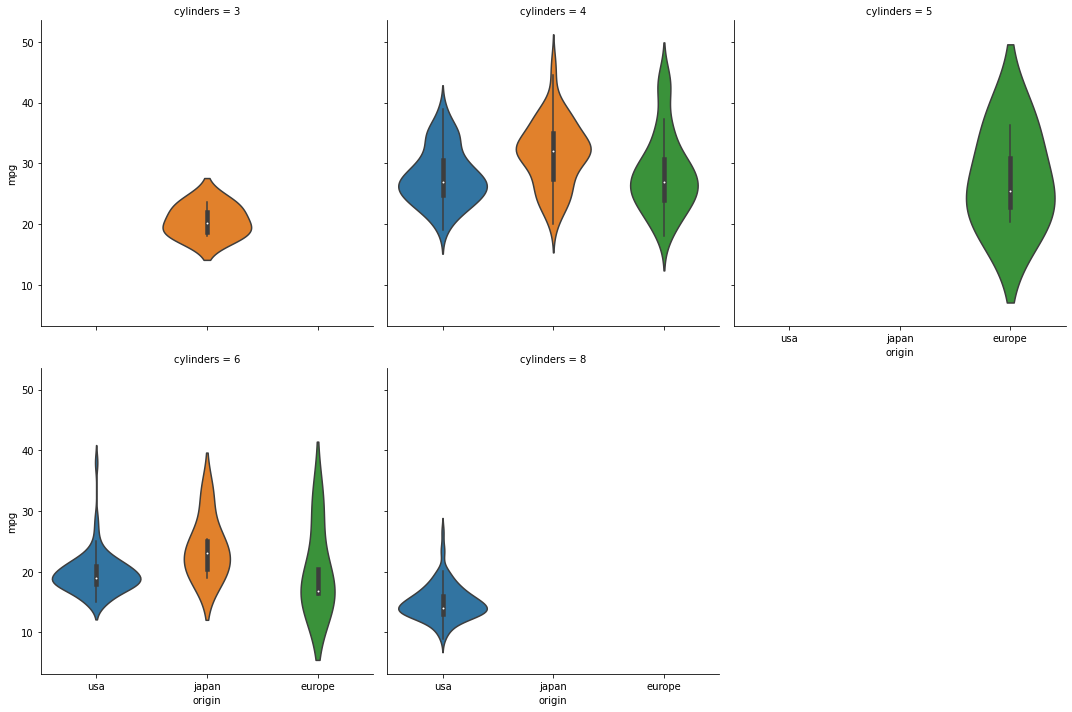

In [69]:
# catplot 으로 violinplot그리기
sns.catplot(data=df,x="origin",y="mpg",kind="violin",col="cylinders",col_wrap=3)

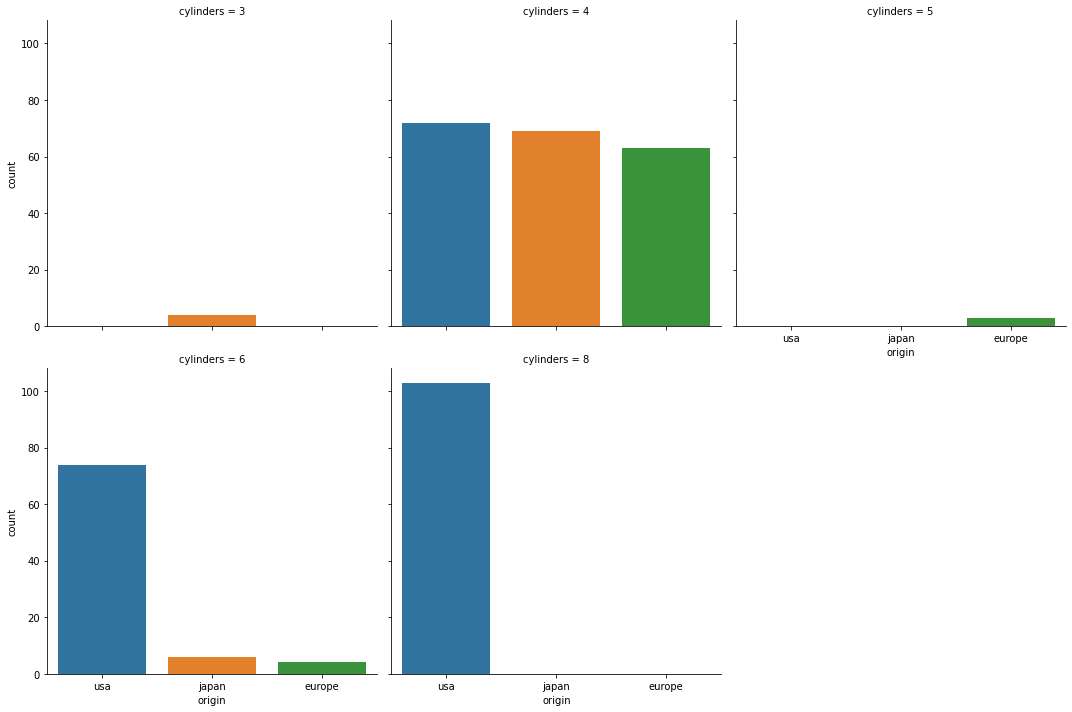

In [70]:
# catplot 으로 countplot그리기
sns.catplot(data=df,x="origin",kind="count",col="cylinders",col_wrap=3)

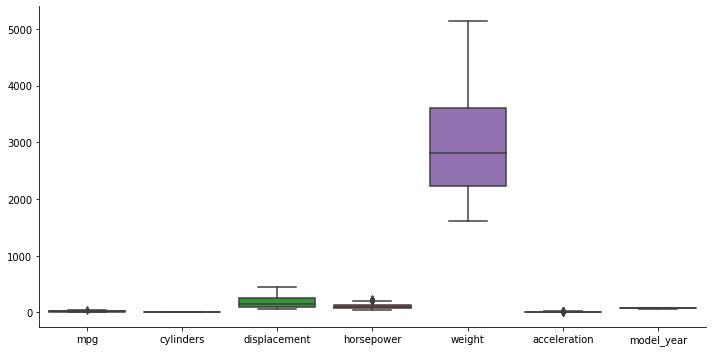

In [74]:
# catplot 으로 boxplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data=df,kind="box",aspect=2)

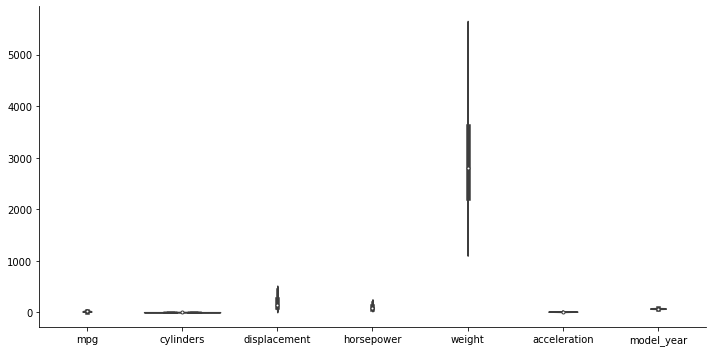

In [73]:
# catplot 으로 violinplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data=df,kind="violin",aspect=2)